In [3]:
%pip install sweetviz
#%pip install ydata_profiling
%pip install shap
#%pip install seaborn
%pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: C:\Python310\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: C:\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: C:\Python310\python.exe -m pip install --upgrade pip



     -------------------------------------- 324.4/324.4 kB 5.0 MB/s eta 0:00:00
  Using cached ydata_profiling-4.6.3-py2.py3-none-any.whl (357 kB)
  Using cached phik-0.12.3-cp310-cp310-win_amd64.whl (663 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached typeguard-4.1.5-py3-none-any.whl (34 kB)
  Using cached pydantic-2.5.3-py3-none-any.whl (381 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Using cached statsmodels-0.14.1-cp310-cp310-win_amd64.whl (9.8 MB)
  Using cached wordcloud-1.9.3-cp310-cp310-win_amd64.whl (299 kB)
  Using cached pydantic_core-2.14.6-cp310-none-win_amd64.whl (1.9 MB)
  Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Note: The following do not work with Python 3.12
#import shap
#from ydata_profiling import ProfileReport
import sweetviz as sv

In [5]:
seed = 2024

# pandas, statsmodels, matplotlib and y_data_profiling rely on numpy's random generator, and thus, we need to set the seed in numpy
np.random.seed(seed)

In [8]:
# load the data
diet = pd.read_csv('diet.csv', sep=",")
recipes = pd.read_csv('recipes.csv', sep=",")
requests = pd.read_csv('requests.csv', sep=",")
reviews = pd.read_csv('reviews.csv', sep=",")

C:\Users\User\AppData\Local\Temp\ipykernel_10504\2790004777.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('reviews.csv', sep=",")


## DIET
1 *Diet* is missing --> ignore instances with missing values

In [9]:
print(diet.head(10))
print(diet.info())

    AuthorId        Diet  Age
0  10000120E  Vegetarian   46
1   1000014D       Vegan   18
2   1000015A  Vegetarian   58
3   1000016E  Vegetarian   32
4   1000027E       Vegan   61
5   1000029E       Vegan   39
6   1000036C  Vegetarian   50
7   1000048E  Vegetarian   44
8   1000079B  Vegetarian   34
9   1000107C    Omnivore   62
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271907 entries, 0 to 271906
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AuthorId  271907 non-null  object
 1   Diet      271906 non-null  object
 2   Age       271907 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.2+ MB
None


In [10]:
print(diet.isnull().sum())
unique_counts = diet.nunique()
print(unique_counts)

AuthorId    0
Diet        1
Age         0
dtype: int64
AuthorId    271907
Diet             3
Age             62
dtype: int64


                 Age
count  271907.000000
mean       48.503727
std        17.898130
min        18.000000
25%        33.000000
50%        48.000000
75%        64.000000
max        79.000000


C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


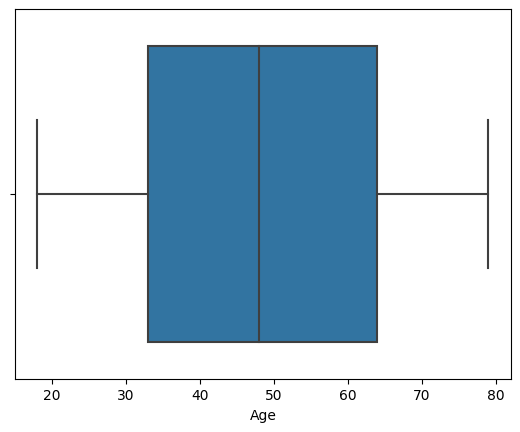

In [13]:
# have a look at common statistics of the dataset
print(diet.describe())
sns.boxplot(diet['Age']);

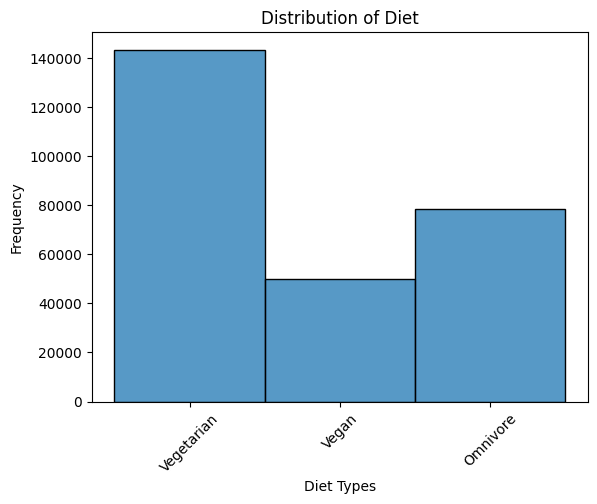

In [21]:
sns.histplot(data=diet, x='Diet', bins=20)

plt.title('Distribution of Diet')
plt.xlabel('Diet Types')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

## RECIPES
*Recipe Servings* and *Recipe Yields* a lot of missing values --> ??
Servings means how many servings you get out of the recipe. Yields determine the absolute number of items you get out of the recipe. For instance, a recipe yields 1/2 liter of soup, which is equivalent to 2 servings.

In [29]:
print(recipes.head(10))
print(recipes.info())


   RecipeId                                      Name  CookTime  PrepTime  \
0     73440              Bow Ties With Broccoli Pesto         0      1800   
1    365718                       Cashew-chutney Rice      3600       600   
2    141757  Copycat Taco Bell Nacho Fries BellGrande      3600      2700   
3    280351  Slow Cooker Jalapeno Cheddar Cheese Soup     18000      1800   
4    180505           Cool & Crisp Citrus Chiffon Pie      3600      1800   
5    350271                  Easy Tomato Onion Relish      1200       300   
6     21518                    Pumpkin Cranberry Bars      2700      1200   
7    137143                          Picadillo Dinner      1200      1500   
8    211563                   KateL's Extreme Pavlova      4200       600   
9     29280                        Death by Chocolate         0       300   

  RecipeCategory                         RecipeIngredientQuantities  \
0          Other  c("\"6\"", "\"2\"", "\"1 1/2\"", "\"1/4\"", "\...   
1         

In [30]:
print(recipes.isnull().sum())
unique_counts = recipes.nunique()
print(unique_counts)

RecipeId                          0
Name                              0
CookTime                          0
PrepTime                          0
RecipeCategory                    0
RecipeIngredientQuantities        0
RecipeIngredientParts             0
Calories                          0
FatContent                        0
SaturatedFatContent               0
CholesterolContent                0
SodiumContent                     0
CarbohydrateContent               0
FiberContent                      0
SugarContent                      0
ProteinContent                    0
RecipeServings                26713
RecipeYield                   50295
dtype: int64
RecipeId                      75604
Name                          70534
CookTime                        246
PrepTime                        166
RecipeCategory                    7
RecipeIngredientQuantities    68882
RecipeIngredientParts         73920
Calories                      14329
FatContent                     2446
SaturatedFatCon

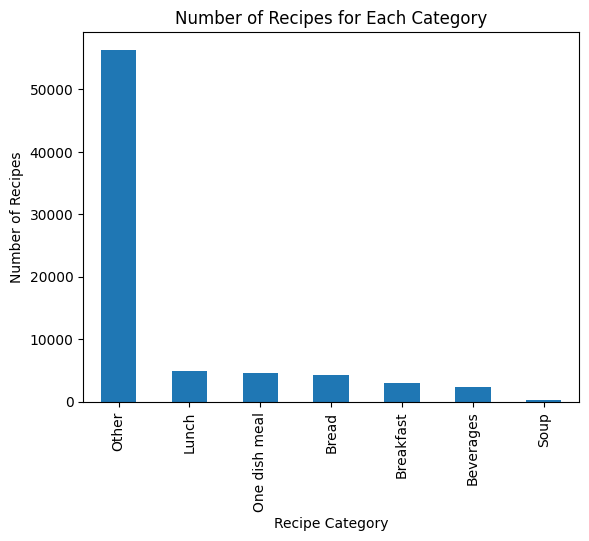

In [31]:
category_counts = recipes['RecipeCategory'].value_counts()
category_counts.plot(kind='bar')
plt.xlabel('Recipe Category')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipes for Each Category')
plt.show()

## Reviews
*Rating* and *Like* a lot of missing values --> For Rating column we can ignore attribute with missing values because except for NAs, there is just 2 as a rating.

In [32]:
print(reviews.head(10))
print(reviews.info())

      AuthorId  RecipeId  Rating Like  TestSetId
0     2492191A     33671     2.0  NaN        1.0
1  2002019979A     92647     2.0  NaN        2.0
2      408594E    161770     NaN  NaN        3.0
3  2001625557E    108231     2.0  NaN        4.0
4  2001427116E     71109     NaN  NaN        5.0
5  2001382952C    148927     NaN  NaN        6.0
6      588901B     87380     2.0  NaN        7.0
7     1038235B      9475     2.0  NaN        8.0
8  2001651474C    106171     2.0  NaN        9.0
9  1803780486A    223201     NaN  NaN       10.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   AuthorId   140195 non-null  object 
 1   RecipeId   140195 non-null  int64  
 2   Rating     77108 non-null   float64
 3   Like       97381 non-null   object 
 4   TestSetId  42814 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.3+ MB
No

In [43]:
print(reviews.isnull().sum())
unique_counts = reviews.nunique()
print(unique_counts)

AuthorId         0
RecipeId         0
Rating       63087
Like         42814
TestSetId    97381
dtype: int64
AuthorId     49348
RecipeId     75604
Rating           1
Like             2
TestSetId    42814
dtype: int64


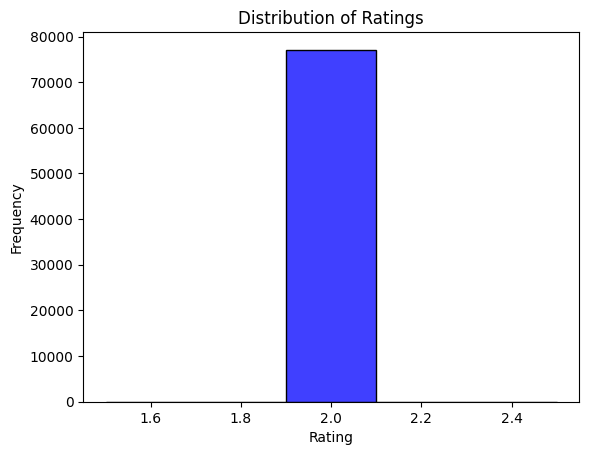

In [44]:
sns.histplot(reviews['Rating'], bins=5, kde=False, color='blue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

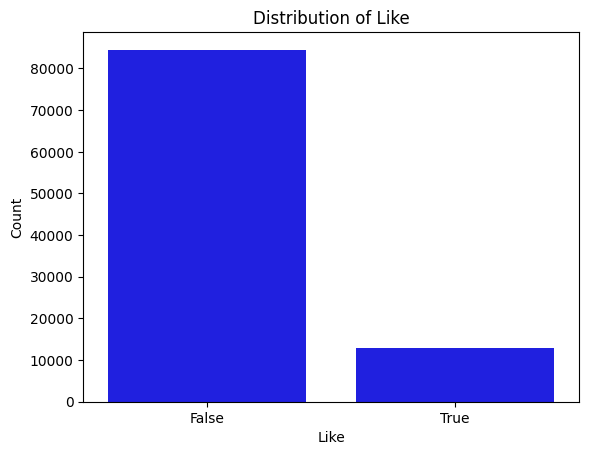

In [49]:
sns.countplot(x='Like', data=reviews, color='blue')
plt.xlabel('Like')
plt.ylabel('Count')
plt.title('Distribution of Like')
plt.show()

## Requests
Combine *AuthorId* and *RecipeId* to get a key

Make HighCalories, HighProtein, LowFat, LowSugar and HighFiber same format.

In [14]:
print(requests.head(10))
print(requests.info())

      AuthorId  RecipeId          Time  HighCalories  HighProtein  LowFat  \
0  2001012259B     73440   1799.950949           0.0  Indifferent       0   
1      437641B    365718   4201.820980           0.0          Yes       0   
2  1803340263D    141757   6299.861496           0.0  Indifferent       1   
3      854048B    280351  19801.365796           0.0          Yes       1   
4     2277685E    180505   5400.093457           0.0  Indifferent       0   
5  2002463647E    350271   1500.690672           0.0  Indifferent       0   
6      181611B     21518   3901.461811           1.0  Indifferent       0   
7       63028B    137143   2699.849907           0.0  Indifferent       0   
8       84090D    211563   4798.990136           1.0          Yes       1   
9      935221A     29280    299.910325           0.0  Indifferent       0   

      LowSugar  HighFiber  
0            0          0  
1  Indifferent          1  
2  Indifferent          0  
3            0          1  
4           

In [15]:
print(requests.isnull().sum())
unique_counts = requests.nunique()
print(unique_counts)

AuthorId        0
RecipeId        0
Time            0
HighCalories    0
HighProtein     0
LowFat          0
LowSugar        0
HighFiber       0
dtype: int64
AuthorId         49348
RecipeId         75604
Time            140195
HighCalories         2
HighProtein          2
LowFat               2
LowSugar             2
HighFiber            2
dtype: int64
